In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# FFNN

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot=True)
import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
batch_x, batch_y = mnist.train.next_batch(128)
print(batch_x.shape) # 128x784
print(batch_y.shape) # 128x10
learning_rate = 0.1
num_steps = 500
batch_size = 128
display_step =100 


(128, 784)
(128, 10)


In [10]:
# 히든 에이러가 2개
# 784(픽셀 1개를 변수로 ) => 784x256 -> 256x256 -> 256x10
n_hidden_1 = 256
n_hidden_2 = 256
num_input = 784
num_classes = 10 # target 0 ~ 9
X = tf.placeholder('float', [None, num_input]) # 128 x 784
Y = tf.placeholder('float', [None, num_classes]) # 128 x 10

In [11]:
# 가중치 : 설명렬, 계수
weights = {
    # 784x256
    'h1':tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    # 256x256
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    # 256x10
    'out':tf.Variable(tf.random_normal([n_hidden_2, num_classes])),
}

# bias : activation
biases = {
    # 256, 변수 개수 만큼
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    # 256
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    # 10
    'out':tf.Variable(tf.random_normal([num_classes])),
}

In [15]:
def neural_net(x):
    layer_1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [16]:
logits = neural_net(X)

# 경사하강법 -> 미분가능 -> 분류
# softmax확률 값으로 계산
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# 최적화기 : 기울기, 학습률
# adgrad : learning-rate 처음엔 크게 -> 점점 작게 끝나지않아도 0으로 만든다.
# momentum + propgrad() : adaptive 적을적으로 현재 상태를 보고
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 가장큰값의 인덱스를 구함(one-hot-encoding) => target
# true, false => 0,1
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y,1))

# 형변환
# 합을 평균함
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# 초기화
init = tf.global_variables_initializer()


In [19]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1,num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X:batch_x, Y:batch_y})
        if step % display_step ==0 or step==1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X:batch_x, Y:batch_y})
            print('Step : {} Minibatch Loss : {:.4f} TrainingAccuracy : {:.3f}'.format(str(step), loss, acc))
    print('테스트 정확도 : ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Step : 1 Minibatch Loss : 9142.0381 TrainingAccuracy : 0.461
Step : 100 Minibatch Loss : 393.4442 TrainingAccuracy : 0.820
Step : 200 Minibatch Loss : 57.8098 TrainingAccuracy : 0.922
Step : 300 Minibatch Loss : 46.1588 TrainingAccuracy : 0.898
Step : 400 Minibatch Loss : 39.6960 TrainingAccuracy : 0.836
Step : 500 Minibatch Loss : 80.1962 TrainingAccuracy : 0.867
테스트 정확도 :  0.8363


In [20]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import tensorflow as tf
boston = load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['const'] = np.ones(df.shape[0]) # 전부 1이라는 변수 추가
df.tail()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,const
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,1.0
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,1.0
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,1.0
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,1.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,1.0


In [28]:
n,m =df.shape
X = tf.placeholder(tf.float64, shape=(n,m)) # 506x14
Y = tf.placeholder(tf.float64, shape=(n,1)) # 506x1
XT = tf.transpose(X) # 14x506
XT.shape, X
m

14

In [25]:
# 14x560, 506x14 => 14x14
# 역행렬(14x14), 14x506 => 14x506
# 14x506, 506x1 => 14x1
# 역행렬을 이용해서 가중치 결정
W = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT,X)), XT), Y)
y_pred = tf.matmul(X,W) # 506x14, 14x1 => 506x1 회귀식
with tf.Session() as sess:
    y_pred_ = sess.run(y_pred, feed_dict={X:df.values, Y:boston.target.reshape(-1,1)})
    
print('예측한 집값 : {} 실제 집값 {} '.format(y_pred_[19], y_pred_[19]))

예측한 집값 : [18.40613603] 실제 집값 [18.40613603] 


In [31]:
import tensorflow as tf
sess = tf.Session()

val = [0,2,3]
val = tf.tile(val, [5]) # 몇개의 타일
print(sess.run(val))

[0 2 3 0 2 3 0 2 3 0 2 3 0 2 3]


In [32]:
val = [[1,1,1],[2,2,2],[3,3,3]] # 3x3
val = tf.tile(val, [5,2]) # 3x3, 5x2 => (3x5)x(3x2) => 15x6
print(sess.run(val))

[[1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]


In [33]:
input_vecs = [[1.,2.],[2.,1.],[-2.,-1]]
tiled_vecs = tf.tile(input_vecs, [1,3])
print(sess.run(tiled_vecs))
tiled_vecs = tf.tile(input_vecs, [2,3])
print(sess.run(tiled_vecs))


[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]
[[ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]
 [ 1.  2.  1.  2.  1.  2.]
 [ 2.  1.  2.  1.  2.  1.]
 [-2. -1. -2. -1. -2. -1.]]


# tile
# kmeans

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.preprocessing import scale
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()

In [91]:
num_pts = len(iris.data) # 행수 150
num_feats = len(iris.data[0]) # columns 개수
k = 3 # 군집수
generations=25 # epoch
data_points=tf.Variable(iris.data)

# 레이블 변수
# 150
cluster_labels = tf.Variable(tf.zeros([num_pts], dtype=tf.int64))

# 중심데이터를 랜덤으로 취함
# 중심의 열변수 개수 -> 4개
# iris.data에서 랜덤으로 뽑는다
# np.random.choice(len(iris.data)) : 랜덤으로 뽑은 행 번호
rand_starts = np.array([iris.data[np.random.choice(len(iris.data))] for _ in range(k)])

# 중심
centroids = tf.Variable(rand_starts)
# reshape(150,3,4)
centroid_matrix = tf.reshape(tf.tile(centroids, [num_pts,1]), [num_pts, k, num_feats])

# 결국 150x12(4개의 변수가 3번더) => reshpae(150x3x4)
point_matrix = tf.reshape(tf.tile(data_points, [1,k]), [num_pts, k, num_feats])

# 열중심으로 한버에 뽑는다.
distances = tf.reduce_sum(tf.square(point_matrix - centroid_matrix), axis=2)

# 중심거리1, 중심거리2, 중심거리3
# argmin : 2개 전체(인덱스, 실제값 비교)
centroid_group = tf.argmin(distances, 1)

In [92]:
# 그룹별로 거리의 평균
# 중심거리를 재계선해서 중심값을 재할당
def data_group_avg(group_ids, data):
    # 라벨번호로 값의 합계 : 라벨 - 값, 그룹이 3개
    sum_total = tf.unsorted_segment_sum(data, group_ids,3)
    # 그룹의 전체 개수
    num_total = tf.unsorted_segment_sum(tf.ones_like(data), group_ids, 3)
    # 그룹의 평균거리
    avg_by_group = sum_total / num_total
    
    return avg_by_group

means = data_group_avg(centroid_group, data_points)
# 업데이트 node를 결정
update = tf.group(centroids.assign(means), cluster_labels.assign(centroid_group))
# 초기화
init = tf.global_variables_initializer()
sess.run(init)

In [93]:
for i in range(generations):
    print('Calculating gen {}, out of {}'.format(i, generations))
    _, centroid_group_count = sess.run([update, centroid_group])
    group_count = []
    
    for ix in range(k):
        group_count.append(np.sum(centroid_group_count == ix))
        
    print('Group counts : {}'.format(group_count))
    
[centers, assignments] = sess.run([centroids, cluster_labels])

Calculating gen 0, out of 25
Group counts : [29, 71, 50]
Calculating gen 1, out of 25
Group counts : [35, 65, 50]
Calculating gen 2, out of 25
Group counts : [39, 61, 50]
Calculating gen 3, out of 25
Group counts : [42, 58, 50]
Calculating gen 4, out of 25
Group counts : [47, 53, 50]
Calculating gen 5, out of 25
Group counts : [50, 50, 50]
Calculating gen 6, out of 25
Group counts : [54, 46, 50]
Calculating gen 7, out of 25
Group counts : [57, 43, 50]
Calculating gen 8, out of 25
Group counts : [60, 40, 50]
Calculating gen 9, out of 25
Group counts : [61, 39, 50]
Calculating gen 10, out of 25
Group counts : [61, 39, 50]
Calculating gen 11, out of 25
Group counts : [61, 39, 50]
Calculating gen 12, out of 25
Group counts : [61, 39, 50]
Calculating gen 13, out of 25
Group counts : [61, 39, 50]
Calculating gen 14, out of 25
Group counts : [61, 39, 50]
Calculating gen 15, out of 25
Group counts : [61, 39, 50]
Calculating gen 16, out of 25
Group counts : [61, 39, 50]
Calculating gen 17, out 

In [48]:
def most_common(my_list):
    return (max(set(my_list), key = my_list.count))

label0 = most_common(list(assignments[0:50])) # 라벨링
label1 = most_common(list(assignments[50:100]))
label2 = most_common(list(assignments[100:150]))

group0_count = np.sum(assignments[0:50] == label0)
group1_count = np.sum(assignments[50:100] == label1)
group2_count = np.sum(assignments[100:150] == label2)

accracy = (group0_count + group1_count + group2_count)/ 150
print('Accracy : {:.2f}'.format(accracy)) # 

Accracy : 0.89


# CNN

In [130]:
import os
def save_fig(fig_id, tight_layout=True):
    path = os.path.join('./images/', fig_id + '.png')
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tilght_layout()
    plt.savefig(path, format='png', dpi=3000) # dot per indch

In [131]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [132]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')

# 70(높이 : 행), 120(가로:열)
image = china[150:220, 130:250] # clipping
height, width, channels = image.shape

# 0 ~255
# axis = 2 : channels => 컬러 3개의 컬러가있는 값들을 평균내서 2차원으로 만듬
image_grayscale = image.mean(axis=2).astype(np.float32)
# 다시 차원을 늘려준다.? 왜????
images = image_grayscale.reshape(1,height, width, 1)

In [133]:
# 흑백
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation='nearest') # 보간법
    plt.axis('off') # 이미니축생략
    
# 컬러
def plot_color_image(image):
    plt.imshow(image.astype(np.unit8), interpolation='nearest')
    plt.axis('off')
# unit8 : 0~255
# 양수만 표현이 가능함
# 2^8개수 만큼 표현이 가능

In [134]:
# 필터 (필터의 높이, 필터의 가로, 입력 채널, 출력 채널)
# 필터 2개 
import numpy as np
fmap = np.zeros(shape=(7,7,1,2), dtype=np.float32)
fmap[:,3,0,0]=1
fmap[3,:,0,1]=1
fmap[:,2,0,0]=2
fmap[2,:,0,1]=2
fmap[:,:,0,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [2., 2., 2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

[[0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0. 0.]]


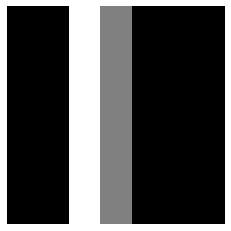

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [2. 2. 2. 2. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


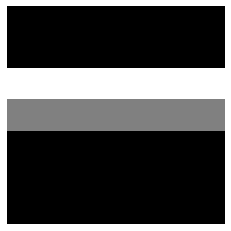

In [135]:
plot_image(fmap[:,:,0,0])
print(fmap[:,:,0,0])
plt.show()
plot_image(fmap[:,:,0,1])
print(fmap[:,:,0,1])
plt.show()



In [136]:
reset_graph()
# 장수, 높이, 가로, 채넣수
X = tf.placeholder(tf.float32, shape=(None, height, width, 1))
feature_maps = tf.constant(fmap) # 필터를 상수로

# convolution은 1d(text), 2d(image), 3d(동영상)
# 패딩 : SAME
# convolution, filter, padding, strides
# 70x120 => 70x120 => padding이 SAME
# 64x114 => padding이 SAME이 아니라면 70-7+1 = 64
# padding : SAME, VALID

convolution = tf.nn.conv2d(X,feature_maps, strides=[1,1,1,1], padding='SAME', use_cudnn_on_gpu=False)
# pooling은 별도로 진행

In [137]:
feature_maps

<tf.Tensor 'Const:0' shape=(7, 7, 1, 2) dtype=float32>

In [138]:
with tf.Session() as sess:
    output = convolution.eval(feed_dict = {X:images})

Saving figure china_original


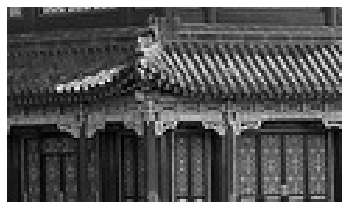

In [139]:
plot_image(images[0,:,:,0])
save_fig('china_original', tight_layout=False)
plt.show()

Saving figure china_vertical


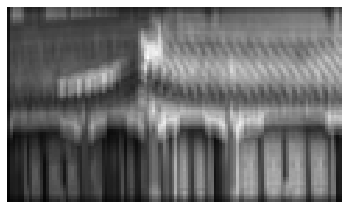

In [140]:
# 2장의 이미지 : 필터가 다르면 특성도 다르게 잡힌다.
plot_image(output[0,:,:,0]) # 0번 필터 적용 : 세로줄
save_fig('china_vertical', tight_layout=False)
plt.show()

Saving figure china_horizonral


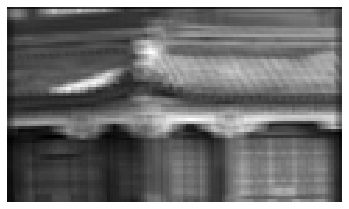

In [143]:
plot_image(output[0,:,:,1])
save_fig('china_horizonral', tight_layout=False)
plt.show()